# Module 6 : Performance measurements of SVM

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as n

In [2]:
#Load given dataset
data = p.read_csv("water.csv")


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.duplicated().sum()

0

In [8]:
data["Potability"].unique()
data[data["Potability"]=='#NUM!']
data = data.drop(data[data["Potability"]=='#NUM!'].index)
data["Potability"].unique()

array([0, 1], dtype=int64)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [10]:
df = data

In [11]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [12]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [13]:
X = data.drop(labels='Potability', axis=1)
#Response variable
y = data.loc[:,'Potability']    

In [14]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# svc


Classification report of Support Vector Machines Results:

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       360
           1       0.00      0.00      0.00       244

    accuracy                           0.60       604
   macro avg       0.30      0.50      0.37       604
weighted avg       0.36      0.60      0.45       604

Accuracy result of Support Vector Machines is: 59.60264900662252

Confusion Matrix result of Support Vector Machines is:
 [[360   0]
 [244   0]]

Sensitivity :  1.0

Specificity :  0.0

Cross validation test results of accuracy:
[0.5955335  0.59701493 0.59701493 0.59701493 0.59701493]

Accuracy result of Support Vector Machine is: 59.671864005036845


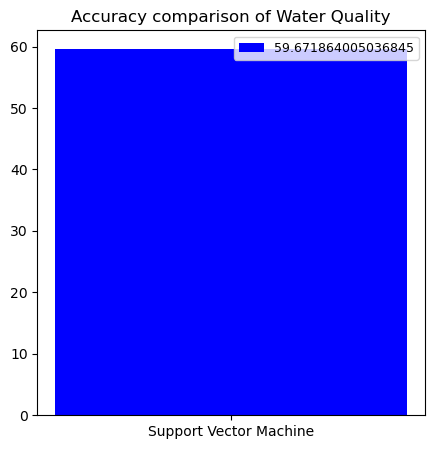

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score


s = SVC()

s.fit(X_train,y_train)

predicts = s.predict(X_test)

print("")
print('Classification report of Support Vector Machines Results:')
print("")

print(classification_report(y_test,predicts))
x = (accuracy_score(y_test,predicts)*100)

print('Accuracy result of Support Vector Machines is:', x)
print("")
cm2=confusion_matrix(y_test,predicts)
print('Confusion Matrix result of Support Vector Machines is:\n',cm2)
print("")
sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(s,X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Support Vector Machine is:",accuracy.mean() * 100)
S=accuracy.mean() * 100





def graph():
    import matplotlib.pyplot as plt
    data=[S]
    alg="Support Vector Machine"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Water Quality")
    plt.legend(b,data,fontsize=9)




graph()


True Positive : 0
True Negative : 244
False Positive : 0
False Negative : 360

True Positive Rate : 0.0
True Negative Rate : 1.0
False Positive Rate : 0.0
False Negative Rate : 1.0

Positive Predictive Value : nan
Negative predictive value : 0.40397350993377484
Confusion matrix-SVM:
[[360   0]
 [244   0]]


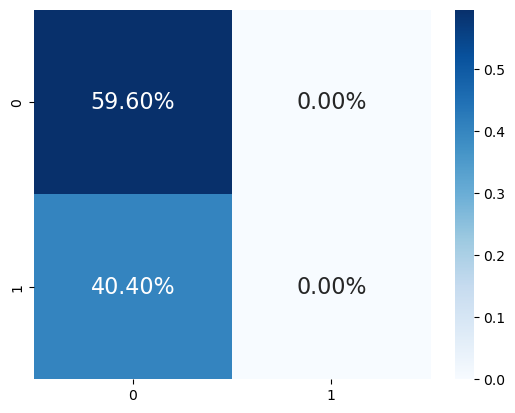

In [16]:
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)


cm2=confusion_matrix(y_test, predicts)
print('Confusion matrix-SVM:')
print(cm2)

sns.heatmap(cm2/n.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16}, fmt='.2%',)
plt.show()